In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from linformer import Linformer
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
from vit_pytorch.efficient import ViT
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import torch.utils.data as data
import torchvision
from torchvision.transforms import ToTensor
from torchvision.transforms import v2
from torchvision.io import read_image
torch.cuda.is_available()

True

In [3]:
batch_size = 64 
epochs = 30
lr = 0.0001
gamma = 0.7
seed = 142
IMG_SIZE = 128
patch_size = 16
num_classes = 2

In [4]:
from torchvision.transforms import v2

train_ds = torchvision.datasets.ImageFolder(
    "./AppleInitialDataset/train",
    v2.Compose([
        v2.RandomResizedCrop(IMG_SIZE),  # image size int or tuple
        # Add more transforms here
        v2.ToTensor(),  # convert to tensor at the end
]))

valid_ds = torchvision.datasets.ImageFolder(
    "./AppleInitialDataset/val",
    v2.Compose([
        v2.RandomResizedCrop(IMG_SIZE),  # image size int or tuple
        # Add more transforms here
        v2.ToTensor(),  # convert to tensor at the end
]))


test_ds = torchvision.datasets.ImageFolder(
    "./AppleInitialDataset/test",
    v2.Compose([
        v2.RandomResizedCrop(IMG_SIZE),  # image size int or tuple
        # Add more transforms here
        v2.ToTensor(),  # convert to tensor at the end
]))



C:\Users\surya\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [5]:
train_loader = data.DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=4)
valid_loader = data.DataLoader(valid_ds, batch_size=batch_size, shuffle=True,  num_workers=4)
test_loader  = data.DataLoader(test_ds, batch_size=batch_size, shuffle=True, num_workers=4)

In [6]:
# Training device:
device = 'cuda'

# Linear Transformer:
efficient_transformer = Linformer(dim=128, seq_len=64+1, depth=12, heads=8, k=64)

# Vision Transformer Model: 
model = ViT(dim=128, image_size=128, patch_size=patch_size, num_classes=num_classes, transformer=efficient_transformer, channels=3).to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# Learning Rate Scheduler for Optimizer:
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

In [43]:
# Training:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)

        with torch.no_grad():
            epoch_val_accuracy = 0
            epoch_val_loss = 0
            
        for data, label in valid_loader:
            
            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)

    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )

  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 1 - loss : 0.6896 - acc: 0.5456 - val_loss : 0.6905 - val_acc: 0.5648



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 2 - loss : 0.5158 - acc: 0.7566 - val_loss : 0.6222 - val_acc: 0.7141



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 3 - loss : 0.4764 - acc: 0.7751 - val_loss : 0.4404 - val_acc: 0.7563



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 4 - loss : 0.4284 - acc: 0.8005 - val_loss : 0.4317 - val_acc: 0.8133



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 5 - loss : 0.4017 - acc: 0.8134 - val_loss : 0.5719 - val_acc: 0.6875



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 6 - loss : 0.3775 - acc: 0.8348 - val_loss : 0.4749 - val_acc: 0.7648



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 7 - loss : 0.3666 - acc: 0.8396 - val_loss : 0.4399 - val_acc: 0.7594



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 8 - loss : 0.3590 - acc: 0.8375 - val_loss : 0.3792 - val_acc: 0.8383



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 9 - loss : 0.3376 - acc: 0.8494 - val_loss : 0.4767 - val_acc: 0.7859



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 10 - loss : 0.3272 - acc: 0.8585 - val_loss : 0.4421 - val_acc: 0.7937



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 11 - loss : 0.3183 - acc: 0.8620 - val_loss : 0.4338 - val_acc: 0.7914



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 12 - loss : 0.3034 - acc: 0.8707 - val_loss : 0.4481 - val_acc: 0.8094



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 13 - loss : 0.3041 - acc: 0.8726 - val_loss : 0.2946 - val_acc: 0.8750



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 14 - loss : 0.2957 - acc: 0.8734 - val_loss : 0.4038 - val_acc: 0.8445



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 15 - loss : 0.2913 - acc: 0.8774 - val_loss : 0.3487 - val_acc: 0.8367



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 16 - loss : 0.2924 - acc: 0.8761 - val_loss : 0.3155 - val_acc: 0.8750



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 17 - loss : 0.2773 - acc: 0.8846 - val_loss : 0.4648 - val_acc: 0.8227



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 18 - loss : 0.2748 - acc: 0.8813 - val_loss : 0.5383 - val_acc: 0.7961



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 19 - loss : 0.2671 - acc: 0.8877 - val_loss : 0.5345 - val_acc: 0.7500



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 20 - loss : 0.2596 - acc: 0.8904 - val_loss : 0.4029 - val_acc: 0.7977



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 21 - loss : 0.2699 - acc: 0.8847 - val_loss : 0.4689 - val_acc: 0.8039



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 22 - loss : 0.2417 - acc: 0.8979 - val_loss : 0.3069 - val_acc: 0.8867



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 23 - loss : 0.2562 - acc: 0.8929 - val_loss : 0.2893 - val_acc: 0.8695



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 24 - loss : 0.2522 - acc: 0.8944 - val_loss : 0.3148 - val_acc: 0.8594



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 25 - loss : 0.2390 - acc: 0.8990 - val_loss : 0.2947 - val_acc: 0.8867



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 26 - loss : 0.2430 - acc: 0.9039 - val_loss : 0.2856 - val_acc: 0.8656



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 27 - loss : 0.2409 - acc: 0.8937 - val_loss : 0.3034 - val_acc: 0.8172



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 28 - loss : 0.2392 - acc: 0.9000 - val_loss : 0.3261 - val_acc: 0.8422



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 29 - loss : 0.2324 - acc: 0.9006 - val_loss : 0.4028 - val_acc: 0.7727



  0%|          | 0/81 [00:00<?, ?it/s]

Epoch : 30 - loss : 0.2327 - acc: 0.9025 - val_loss : 0.2989 - val_acc: 0.8617



In [3]:
# Save Model:
PATH = "epochs"+"_"+str(epochs)+"_"+"img"+"_"+str(IMG_SIZE)+"_"+"patch"+"_"+str(patch_size)+"_"+"lr"+"_"+str(lr)+".pt"
torch.save(model.state_dict(), PATH)

NameError: name 'model' is not defined

In [7]:
# load saved model:
PATH = "epochs"+"_"+str(epochs)+"_"+"img"+"_"+str(IMG_SIZE)+"_"+"patch"+"_"+str(patch_size)+"_"+"lr"+"_"+str(lr)+".pt"
efficient_transformer = Linformer(dim=128, seq_len=64+1, depth=12, heads=8, k=64)
model = ViT(image_size=128, patch_size=16, num_classes=2, dim=128 ,transformer=efficient_transformer, channels=3).to('cpu')
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [8]:
def overall_accuracy(model, test_loader, criterion):
    
    '''
    Model testing 
    
    Args:
        model: model used during training and validation
        test_loader: data loader object containing testing data
        criterion: loss function used
    
    Returns:
        test_loss: calculated loss during testing
        accuracy: calculated accuracy during testing
        y_proba: predicted class probabilities
        y_truth: ground truth of testing data
    '''
    
    with torch.no_grad():
        y_proba = []
        y_truth = []
        test_loss = 0
        total = 0
        correct = 0
        for data in tqdm(test_loader, desc="Testing"):
            X, y = data
            X, y = X.to('cpu'), y.to('cpu')
            output = model(X)
            test_loss += criterion(output, y.long()).item()
            for index, i in enumerate(output):
                y_proba.append(i[1])
                y_truth.append(y[index])
                if torch.argmax(i) == y[index]:
                    correct+=1
                total+=1
                
        accuracy = correct/total
    
        y_proba_out = np.array([float(y_proba[i]) for i in range(len(y_proba))])
        y_truth_out = np.array([float(y_truth[i]) for i in range(len(y_truth))])
    
        return test_loss, accuracy, y_proba_out, y_truth_out


loss, acc, y_proba, y_truth = overall_accuracy(model, test_loader, criterion = nn.CrossEntropyLoss())


print(f"Accuracy: {acc}")

print(pd.value_counts(y_truth))

Testing:   0%|          | 0/13 [00:00<?, ?it/s]

Accuracy: 0.9227848101265823
1.0    395
0.0    395
dtype: int64


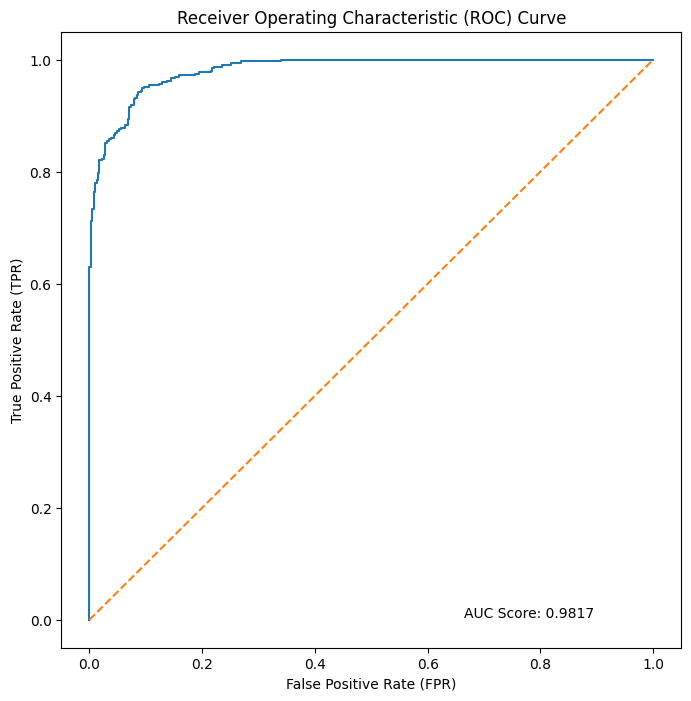

In [10]:
def plot_ROCAUC_curve(y_truth, y_proba, fig_size):
    
    '''
    Plots the Receiver Operating Characteristic Curve (ROC) and displays Area Under the Curve (AUC) score.
    
    Args:
        y_truth: ground truth for testing data output
        y_proba: class probabilties predicted from model
        fig_size: size of the output pyplot figure
    
    Returns: void
    '''
    
    fpr, tpr, threshold = roc_curve(y_truth, y_proba)
    auc_score = roc_auc_score(y_truth, y_proba)
    txt_box = "AUC Score: " + str(round(auc_score, 4))
    plt.figure(figsize=fig_size)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'--')
    plt.annotate(txt_box, xy=(0.65, 0.05), xycoords='axes fraction')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
#     plt.savefig('ROC.png')
plot_ROCAUC_curve(y_truth, y_proba, (8, 8))

<AxesSubplot: >

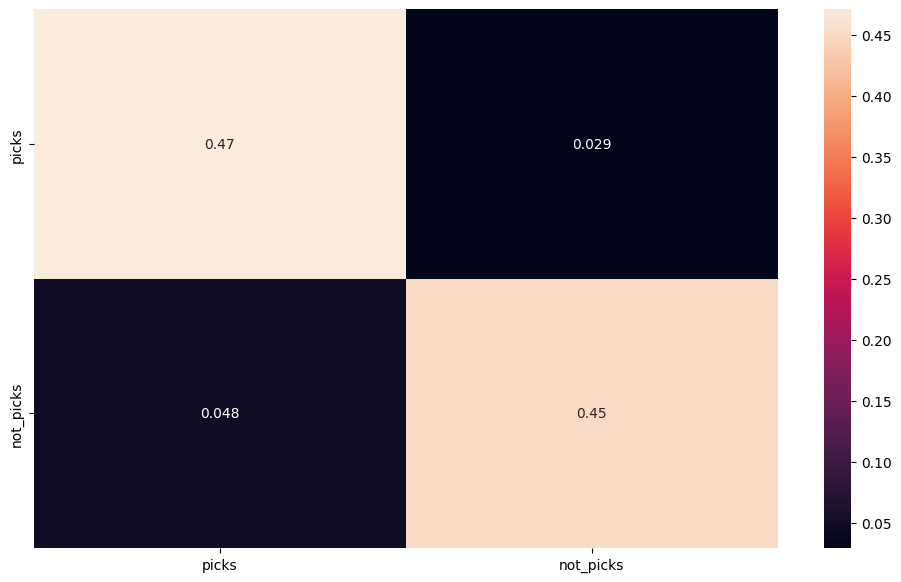

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

net = model
# iterate over test data
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('picks', 'not_picks')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
# plt.savefig('cm.png')

predicted pick tensor: tensor([[ 2.3745, -2.3211]], grad_fn=<AddmmBackward0>)
predicted not_pick tensor: tensor([[0.0200, 0.0133]], grad_fn=<AddmmBackward0>)

Pick


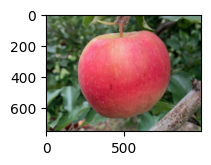

Not Pick


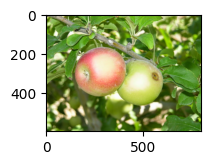

In [18]:
# Inference on Single Images
test_image = "t.jpg"
test_image_null = "pinkladyunrip.jpg"
image = Image.open(test_image)
image_null = Image.open(test_image_null)

# Define tensor transform and apply it:
#data_transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])

data_transform = v2.Compose([
        v2.RandomResizedCrop(IMG_SIZE),  # image size int or tuple
        # Add more transforms here
        v2.ToTensor(),  # convert to tensor at the end
])

image_t = data_transform(image).unsqueeze(0)
image_null_t = data_transform(image_null).unsqueeze(0)

# Labels:
for inputs, labels in test_loader:
        labels = labels.data.cpu().numpy()

# Prediction:
out_fresh = model(image_t)
out_rotten= model(image_null_t)
print("predicted pick tensor:", out_fresh)
print("predicted not_pick tensor:", out_rotten)
print("")

# Print:
if(labels[out_fresh.argmax()]== 0):
    print("Not Pick")
else:
    print("Pick")
    
# Show Image:
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.show()
# Print:
if(labels[out_rotten.argmax()]== 0):
    print("Pick")
else:
    print("Not Pick")
    
# Show Image Null:
plt.figure(figsize=(2, 2))
plt.imshow(image_null)
plt.show()